In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import networkx as nx
import numpy.fft
import random
from source.connectivity import *
%load_ext autoreload
%autoreload 2


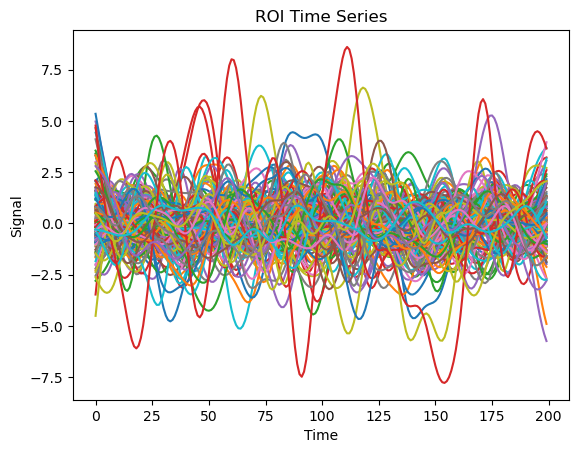

In [3]:
#reads the file and creates a domain and range that will be plotted

data = process_roi_files('/Users/nivaranavat/UCI Research/Data/SAL_01', start=2, end=152,plot = True )

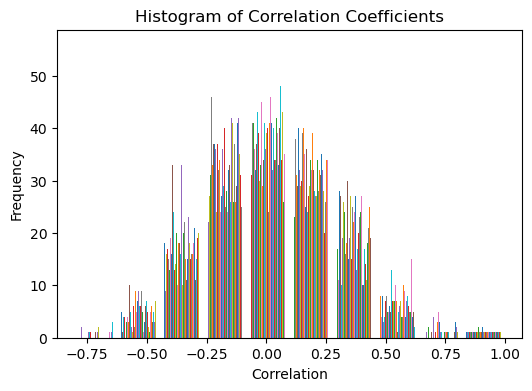

<Figure size 600x600 with 0 Axes>

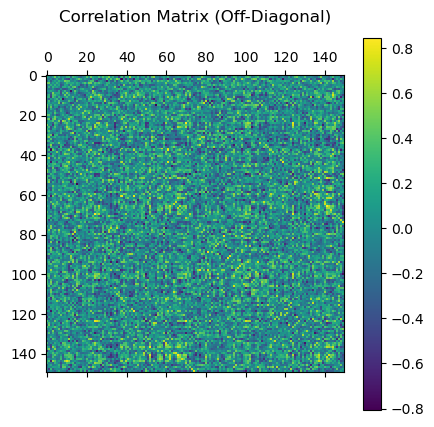

In [5]:
#creating a correlation matrix out of the 2d array of input from above
corr_matrix = compute_and_plot_correlation(data, plot = True)

Threshold 0.40237705730691836


<Figure size 600x600 with 0 Axes>

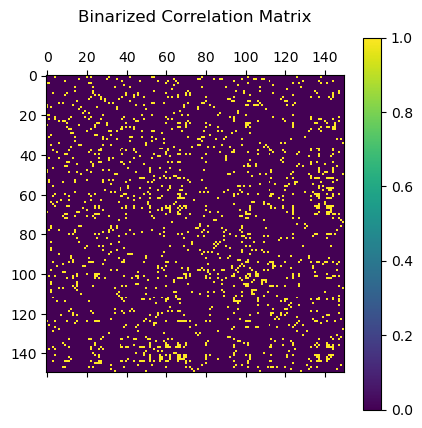

In [7]:
#need to fix the threshold
#when the values are sorted, needs to be the 15% value
#takes a correlation matrix, and makes values above the threshold 1, and ones below 0
#"binarizes" the matrix that is passed in and plots it 
matrix = corr_matrix.copy()
binary_matrix = binarize_correlation_matrix(matrix, plot = True)
binary_matrix = np.array(binary_matrix)

In [8]:
#takes the binarized matrix and makes a network graph out of it
#returning the network variable
network = create_network(binary_matrix)

AttributeError: module 'networkx' has no attribute 'from_numpy_matrix'

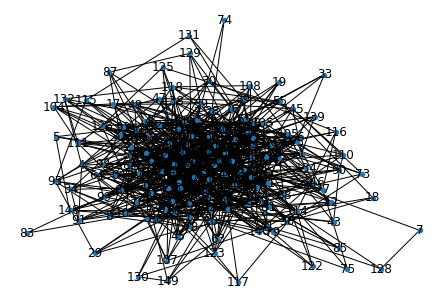

In [60]:
# randomized graph
# since it is hard to randomize the graph given
# try randomizing the binarized matrix
# be careful to only randomize edges that are connected
#this is not working need to figure it out
null3,r = bct.randmio_und_signed(binary_matrix,2)
null3_network1 = create_network(null3)

# import random
# matrixCopy = matrix
# length = len(matrixCopy)
# for r in matrixCopy:
#     for c in range(r+1, length):
#         i = random.randint(0,length-1)
#         j = random.randint(0,length-1)
#         if matrixCopy[r][c]==1 and matrixCopy[i][j] ==1:
#             matrixCopy[r][c] = matrixCopy[i][j] =  matrixCopy[c][r] = matrixCopy[j][i] = 0
#             matrixCopy[r][j] = matrixCopy[j][r] = matrixCopy[i][c] = matrixCopy[c][i] = 1
# #             matrixCopy[r][j] , matrixCopy[i][c] = matrixCopy[i][c], matrixCopy[r][j]
# #             matrixCopy[j][r] , matrixCopy[c][i] = matrixCopy[c][i], matrixCopy[j][r]
        
# createNetwork(matrixCopy)


(array([[ 1.        , -0.05336209, -0.3859685 , ..., -0.20875468,
        -0.29499366,  0.12773797],
       [-0.05336209,  1.        ,  0.13937967, ..., -0.05172698,
         0.06930648, -0.40009696],
       [-0.3859685 ,  0.13937967,  1.        , ...,  0.05255507,
        -0.01515951, -0.44960398],
       ...,
       [-0.20875468, -0.05172698,  0.05255507, ...,  1.        ,
         0.2951993 , -0.37549674],
       [-0.29499366,  0.06930648, -0.01515951, ...,  0.2951993 ,
         1.        , -0.70271891],
       [ 0.12773797, -0.40009696, -0.44960398, ..., -0.37549674,
        -0.70271891,  1.        ]]), 22348)


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Threshold 0.40237705730691836


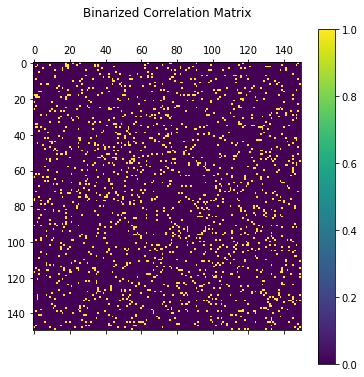

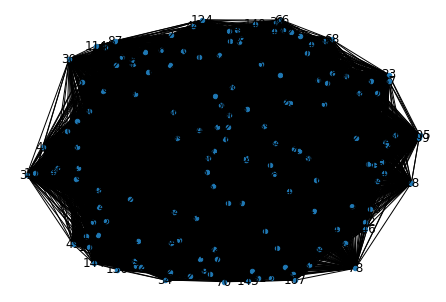

In [61]:
#need to create a randomized correlation matrix
#to create it, take two values if a value is C (r,c) with r as row and c as column
#and switch the two values
#remember to do the same to the other half of the matrix and make it symmetrix
#example C(1,2) and C(3,4) switch the two weights 
#loop through all boxes in the matrix to make sure that every value gets switched and use randomint to find the other box
#draw the graph at the end

#print(any(type(j)=='tuple' for i in np.array(corr_matrix) for j in i))
null2 = randmio_und_signed(np.array(corr_matrix),2)
print(null2)
null2, r = null_model_und_sign(np.array(corr_matrix),8, 1)

null2 = randomize_correlation_matrix(corr_matrix)
binarize_correlation_matrix(null2, plot = True)
null_network2 = create_network(null2)


In [62]:
# print(corr_matrix)
# print(corr_matrix.T)
# null2,r = null_model_und_sign(corr_matrix)
# binarize(null2)
# null2_network = createNetwork(null2)

the original series


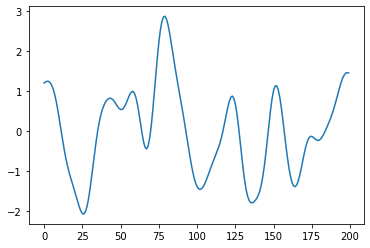

101
[ 0.03027276+0.00000000e+00j -0.59147417-3.11025933e+00j
  0.88048133+4.71502692e+00j  4.09462056+3.18344416e-01j
  1.51485844+1.54866895e+00j  6.31541304-3.18946202e-01j
 -3.64599789-5.34430831e-01j  0.58342759-1.98877235e+00j
  1.7299301 -9.91256333e-01j -1.08521828+2.18506345e+00j
  0.40616422+8.84474001e-01j -0.03162686-9.47946485e-01j
 -0.78832057-3.27330457e-01j  0.84178631+6.11701914e-02j
 -0.404452  -2.34417008e-02j -0.36924311-1.56395831e-02j
  0.1512088 +2.50932408e-01j -0.09824055+2.41403925e-01j
 -0.09548276+9.36465887e-03j -0.02499986+1.94298148e-02j
 -0.03649695+3.93524573e-03j -0.03828666+2.18927881e-02j
 -0.01276896+2.22228781e-02j -0.01300673+2.02441453e-02j
 -0.02245394+2.26818657e-02j -0.0208243 +2.16221934e-02j
 -0.01764898+1.71700276e-02j -0.01716548+1.89078050e-02j
 -0.01681515+1.79686113e-02j -0.01622226+1.68384212e-02j
 -0.01542443+1.59737181e-02j -0.01507704+1.54596730e-02j
 -0.01460039+1.48376883e-02j -0.01419149+1.42387441e-02j
 -0.0138092 +1.36788369e-02

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


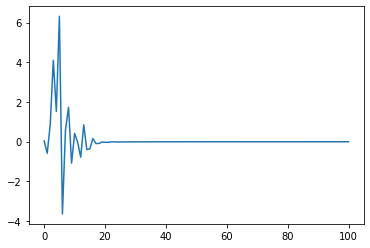

phases


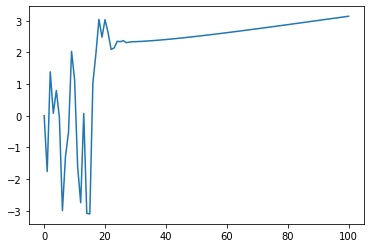

<class 'numpy.ndarray'>
[ 0.         -1.75872115  1.38618324  0.0775909   0.79643418 -0.05045995
 -2.99604899 -1.28544173 -0.52033271  2.03176274  1.14030523 -1.6041475
 -2.74803051  0.07253962 -3.08369826 -3.09926217  1.02847623  1.95728403
  3.04382836  2.48091142  3.03418366  2.62215723  2.09231957  2.14187646
  2.35114465  2.33739917  2.36994922  2.30793246  2.32304576  2.33755933
  2.33870196  2.3436649   2.3481336   2.35453249  2.36093698  2.36761823
  2.37460513  2.38213226  2.38989413  2.3981356   2.40665719  2.41563495
  2.42481192  2.43422472  2.44404784  2.45371518  2.46395021  2.47424909
  2.48501457  2.49568398  2.50636484  2.51756621  2.52855063  2.5398373
  2.55118744  2.5628681   2.5746232   2.58642409  2.59800709  2.61038998
  2.62203093  2.63432637  2.64650562  2.65864195  2.67093608  2.68365793
  2.69599949  2.7086779   2.72131411  2.7340197   2.74653058  2.75924563
  2.77232241  2.78499962  2.79776293  2.81090233  2.82366545  2.83710026
  2.84985387  2.86295481  2.8

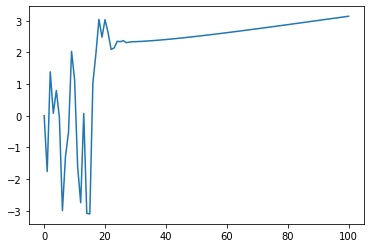

101
<class 'numpy.ndarray'>


In [63]:
series = pd.Series(data[0], index = x)
plt.plot(series) 
print("the original series") 
plt.show()

#fourier = DFT_slow(series)
#print(fourier)
fourier = numpy.fft.rfft(series,norm = "ortho")

#freq = np.fft.fftfreq(x.shape[-1])
#plt.plot(freq, fourier.real, freq, fourier.imag)
print(len(fourier)) 
print(fourier)
#plt.show()

#plt.plot(x, fourier.real, 'b-', x, fourier.imag, 'r--')
plt.plot(fourier) 
print("fourier transform") 
plt.show()

#pow_fs = fourier[1:-1:2]2 + fourier[2::2]2
#phase_fs = np.arctan2(fourier[2::2], fourier[1:-1:2])
pow_fs = np.abs(fourier) ** 2 
phase_fs = np.angle(fourier) 

print("phases")
plt.plot(phase_fs)
plt.show()
phase_fsr = phase_fs.copy() 
print(type(phase_fsr)) 
print(phase_fsr) 
print("before shuffled") 
plt.plot(phase_fsr) 
plt.show()

print(len(phase_fsr))
print(type(phase_fsr))
# phase_fsr_lh = phase_fsr[1:len(phase_fsr)//2] print(len(phase_fsr_lh)) 
#np.random.shuffle(phase_fsr_lh) 
#phase_fsr_rh = -phase_fsr_lh[::-1] print(len(phase_fsr_rh)) 
#phase_fsr = np.append(phase_fsr[0], np.append(phase_fsr_lh, np.append(phase_fsr[len(phase_fsr)//2], phase_fsr_rh)))
# print(len(phase_fsr))
# phase_fsr = phase_fsr+phase_fsr[0]
# print(len(phase_fsr))
# phase_fsr_lh = phase_fsr[1:len(phase_fsr)/2]
# np.random.shuffle(phase_fsr_lh)
# phase_fsr_rh = -phase_fsr_lh[::-1]
# phase_fsr = np.append(phase_fsr[0],np.append(phase_fsr_lh, np.append(phase_fsr[len(phase_fsr)/2],phase_fsr_rh)))

#np.random.shuffle(phase_fsr)
# for i in range(len(phase_fsr)):
# rotate = random.uniform(0,2*math.pi)
# phase_fsr[i]+=rotate

shuffled


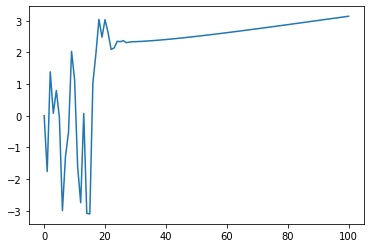

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


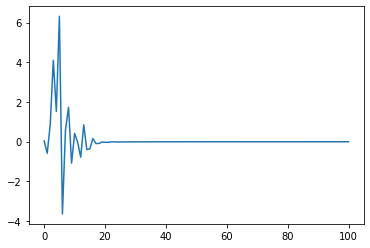

[ 0.08455088  0.08660997  0.08762679  0.08717778  0.08482241  0.08015692
  0.07287937  0.06286681  0.05023584  0.0353745   0.01892578  0.00171461
 -0.015373   -0.0315347  -0.04618885 -0.05906965 -0.07025587 -0.08012298
 -0.08922344 -0.09812662 -0.10723911 -0.11665918 -0.12609623 -0.13486789
 -0.1419927  -0.14635343 -0.14690214 -0.14286527 -0.13391047 -0.12024209
 -0.10259695 -0.08214954 -0.06032936 -0.03860315 -0.01825212 -0.00020444
  0.01504667  0.02742379  0.03715889  0.04463703  0.05023782  0.05422187
  0.0566908   0.05762623  0.05698772  0.05483359  0.05141967  0.04724286
  0.04300935  0.0395325   0.03758499  0.03773956  0.04023685  0.0449063
  0.05115309  0.05801097  0.06425154  0.06853823  0.06961403  0.06650707
  0.05873384  0.04646526  0.03061589  0.01281928 -0.00473161 -0.01956784
 -0.02930774 -0.0320318  -0.02659245 -0.01279665  0.00856957  0.03586884
  0.06685659  0.09898576  0.12971591  0.15678891  0.1784285   0.19347573
  0.20143917  0.20247366  0.1972934   0.18703328  0.

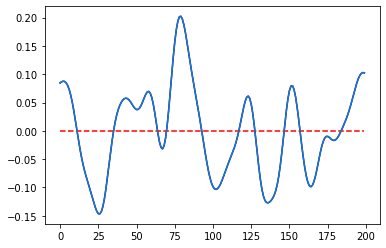

In [64]:
print("shuffled")
plt.plot(phase_fsr)
plt.show()
#     fsrp = np.sqrt(pow_fs[:, np.newaxis]) * np.c_[np.cos(phase_fsr), np.sin(phase_fsr)]
#     fsrp = np.r_[fourier[0], fsrp.ravel(), fourier[-1]]
fsrp = np.sqrt(pow_fs) * (np.cos(phase_fsr) + 1j * np.sin(phase_fsr))
#plt.plot(x, fsrp.real, 'b-', x, fsrp.imag, 'r--')
plt.plot(fsrp)
plt.show()
tsr = numpy.fft.irfft(fsrp)
print(tsr)
plt.plot(x, tsr.real, 'b-', x, tsr.imag, 'r--')
print(data[0])
plt.plot(tsr)
print("reverted the randomized using inverse fourier")
plt.show()

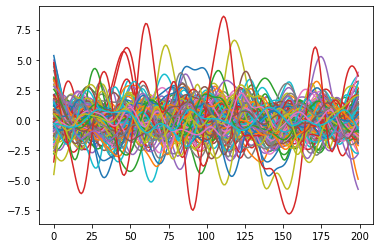

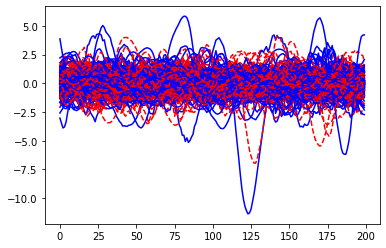

In [65]:
#null1 
import math
for i in range(len(data)):
        plt.plot(x,data[i])
plt.show()

#fix the number of plots in time series something is getting cut
#going from 200 to 100 problem
#most likely a normalization problem, 
#make it so that the units on every plot is the same and the number of plots is the same
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)



def scramblingTimeSeries(nparray,n):
    #all_phases = []
    #for i in range(len(data)):
    series = pd.Series(nparray, index = x)
    fourier = DFT_slow(series)
    #fourier = numpy.fft.fft(series,norm = "ortho")
    pow_fs = np.abs(fourier) ** 2.
    phase_fs = np.angle(fourier)
    phase_fsr = phase_fs.copy()
    if(n%2==0):
        np.random.shuffle(phase_fsr)
    for i in range(len(phase_fsr)):
        rotate = random.uniform(0,2*math.pi)
        phase_fsr[i]+=rotate
    fsrp = np.sqrt(pow_fs) * (np.cos(phase_fsr) + 1j * np.sin(phase_fsr))
    tsr = numpy.fft.ifft(fsrp)
    plt.plot(x, tsr.real, 'b-', x, tsr.imag, 'r--')
    #plt.plot(tsr)
    #plt.show()
    return tsr



timeSeries = []
#doing the fourier transform on each 
for i in range(len(data)):
        series = scramblingTimeSeries(data[i],i)
        timeSeries.append(series)
plt.show()



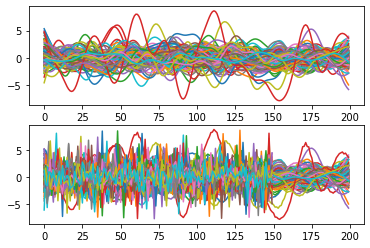

In [66]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.arange(0,200)

newTimeSeries = []
matrix = []
fig,ax = plt.subplots(2)
for i in range(2,152):
    data = np.loadtxt('/Users/nivaranavat/UCI Research/Data/SAL_01/roi'+str(i)+'.txt')
    (cA,cD) = pywt.dwt(data,'db2')
    randomized = np.random.permutation(cD)
    newSignal = pywt.idwt(cA,randomized,'db2')
    newTimeSeries.append(newSignal)
    matrix.append(data)
    ax[0].plot(data)
    ax[1].plot(newSignal)
matrix = np.array(matrix)
for i in range(0,200):
    col = matrix[:,i]
    matrix[:,i] = np.random.permutation(col)
plt.plot(matrix)
plt.show()
# plt.plot(data, label = "original")
# plt.legend()
# plt.show()

# print(cD)
# plt.plot(cD,label = "transformed")
# plt.legend()
# plt.show()

# plt.plot(randomized,label = "randomized")
# plt.legend()
# plt.show()

# plt.plot(newSignal, label = "newsignal")
# print(data)
# print(newSignal)
# plt.legend()
# plt.show()

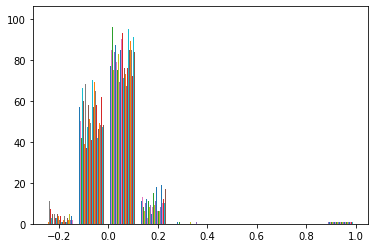

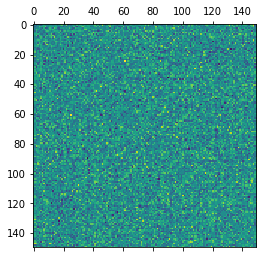

In [67]:
df = pd.DataFrame(matrix)
df_transposed = df.T
corr_matrix = df_transposed.corr(method = "pearson")
corr_matrix = np.array(corr_matrix)
plt.hist(corr_matrix)
plt.matshow(corr_matrix-np.identity(150))
plt.show()

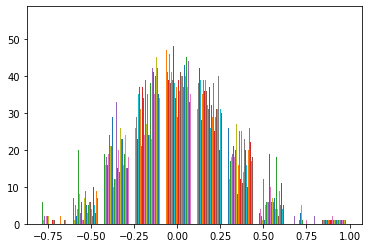

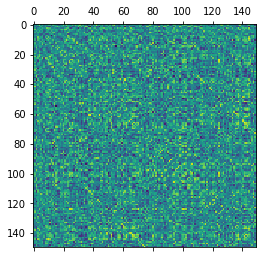

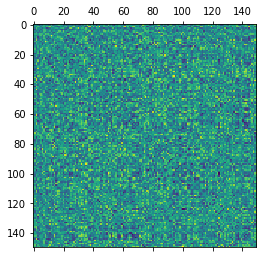

In [68]:
df = pd.DataFrame(newTimeSeries)
df_transposed = df.T
null1 = df_transposed.corr(method = "pearson")
null1 = np.array(null1)
plt.hist(null1)
plt.matshow(null1 - np.identity(150))
plt.matshow((corr_matrix-np.identity(150))-(null1-np.identity(150)))
plt.show()

In [69]:
#null1 creating the network
from scipy.stats import pearsonr
df_null1 = pd.DataFrame(timeSeries)
df_transposed = df.T
null1 = df_transposed.corr()
null1 = np.array(null1)
corr = np.correlate(data[0], data[1])
result = numpy.correlate(data[0], data[0], mode='full')
#result = result[result.size/2:]
print(result)
print(len(result))
print(corr_matrix)
print(null1)
plt.matshow(null1-np.identity(150))
plt.show()
plt.matshow((corr_matrix-np.identity(150))-(null1-np.identity(150)))
plt.show()
plt.hist(corr_matrix)
plt.show()
plt.hist(null1)
plt.show()
binarize(null1)
null1_network = createNetwork(null1)

ValueError: object of too small depth for desired array

In [ ]:
#next step is to check the degree preservation
#make sure that the sorted list of degrees of null versus brain network are the same
#after that find the clustering coefficient for all networks 
#equation is cc(brain)/cc(null)
#do it for each null
#do same for path lengths
#values should be >1 or ~1
#then to calculate the small worldness by doing clustering coefficient/pathlength

brain_degree = sorted(matrix.sum(axis=1))
null3_degree = sorted(null3.sum(axis=1))
null2_degree = sorted(null2.sum(axis=1))
null1_degree = sorted(null1.sum(axis=1))


plt.hist(brain_degree)
plt.show()
#plt.matshow(brain_degree)
plt.hist(null3_degree)
plt.show()
plt.hist(null2_degree)
plt.show()
plt.hist(null1_degree)
plt.show()

preserved = True
for i in range(len(brain_degree)):
    if brain_degree[i] != null3_degree[i]:
        print(f"Error: The degree of the null3 network has NOT been preserved, degree {brain_degree[i]} is not preserved")
        preserved = False
        break 
    elif brain_degree[i] != null2_degree[i]:
        print(f"Error: The degree of the null2 network has NOT been preserved, degree {brain_degree[i]} is not preserved")
        preserved = False
        break

if preserved:
    print("The degree of the networks has been preserved") 

print()

brain_coef = bct.clustering_coef_bu(matrix).sum()
print("brains clustering coefficient", brain_coef)
null3_coef = bct.clustering_coef_bu(null3).sum()
print("null3 clustering coefficient", null3_coef)
null2_coef = bct.clustering_coef_bu(null2).sum()
print("null2 clustering coefficient", null2_coef)
null1_coef = bct.clustering_coef_bu(null1).sum()
print("null1 clustering coefficient", null1_coef)

print()


brain_charPath = bct.charpath(bct.distance_bin(matrix))[0]
print("brains path length", brain_charPath)
null3_charPath = bct.charpath(bct.distance_bin(null3))[0]
print("null3 path length", null3_charPath)
null2_charPath = bct.charpath(bct.distance_bin(null2))[0]
print("null2 path length", null2_charPath)
null1_charPath = bct.charpath(bct.distance_bin(null1))[0]
print("null1 path length", null1_charPath)

print()
print("Ratios:")
print("Brain/Null3 path length: ", brain_charPath/null3_charPath)
print("Brain/Null2 path length: ", brain_charPath/null2_charPath)
print("Brain/Null1 path length: ", brain_charPath/null1_charPath)
print("Brain/Null3 clustering coefficient: ", brain_coef/null3_coef)
print("Brain/Null2 clustering coefficient: " , brain_coef/null2_coef)
print("Brain/Null1 clustering coefficient: " , brain_coef/null1_coef)
print()
print("Brain small worldness with null3: ", (brain_coef/null3_coef)/(brain_charPath/null3_charPath))
print("Brain small worldness with null2: ", (brain_coef/null2_coef)/(brain_charPath/null2_charPath))
print("Brain small worldness with null1: ", (brain_coef/null1_coef)/(brain_charPath/null1_charPath))
